In [1]:
# Parameters initialization and plotting the simulation
# Import necessary routines
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
import timeit

plt.switch_backend("nbagg")           # plots within this notebook

In [2]:
# FUNCTION decimal range step value  
def drange(start, stop, step):
    r = start
    while r < stop:
        yield r
        r += step

In [3]:
def Dx(u, nx, dx, order):
    # standard low-order finite difference operators for first derivatives du/dx
    
    # Initialize the derivative vector
    ux = 0*u
    
    m = nx-1
    
    # central difference approximation
    if order == 2:
        # calculate partial derivatives on the boundaries:[0, m] with periodic difference closure
        #ux[0, :] = (u[1, :] -  u[m-1, :])/(2*dx)
        #ux[m, :] = (u[1, :] -  u[m-1, :])/(2*dx)
        # 
        ux[0, :] = (u[1, :] -  u[0, :])/dx
        ux[m, :] = (u[m, :] -  u[m-1, :])/dx
        #calculate partial derivatives in the interior:(1:nx-1)
        for j in range(1, m):
            ux[j, :] = (u[j+1, :] -  u[j-1, :])/(2.0*dx)
    elif order == 4:
        ux[0, :] = -24./17*u[0, :] + 59./34*u[1, :]  - 4./17*u[2, :] - 3./34*u[3, :]
        ux[1, :] = -1./2*u[0, :] + 1./2*u[2, :]
        ux[2, :] = 4./43*u[0, :] - 59./86*u[1, :]  + 59./86*u[3, :] - 4./43*u[4, :]
        ux[3, :] = 3./98*u[0, :] - 59./98*u[2, :]  + 32./49*u[4, :] - 4./49*u[5, :]


        ux[nx-1, :] = 24./17*u[nx-1, :] - 59./34*u[nx-2, :]  + 4./17*u[nx-3, :] + 3./34*u[nx-4, :]
        ux[nx-2, :] = 1./2*u[nx-1, :] - 1./2*u[nx-3, :]
        ux[nx-3, :] = -4./43*u[nx-1, :] + 59./86*u[nx-2, :]- 59./86*u[nx-4, :]+ 4./43*u[nx-5, :]
        ux[nx-4, :] = -3./98*u[nx-1, :] + 59./98*u[nx-3, :]- 32./49*u[nx-5, :]+ 4./49*u[nx-6, :]

        # interior points x_j (j = 4, ... nx-5)     
        #------------------------------------------------------------------------------------------------------------------------------
        for j in range(4, nx-4):
            ux[j, :] = 1./12*u[j-2, :] - 2./3*u[j-1, :] + 2./3*u[j+1, :] - 1./12*u[j+2, :]

        ux[:, :] = ux/dx
        
    return ux
        
def Dy(u, ny, dy, order):
    # standard low-order finite difference operators for first derivatives du/dx
    
    # Initialize the derivative vector
    uy = 0*u
    
    m = ny-1
    # central difference approximation
    if order == 2:
        # calculate partial derivatives on the boundaries:[0, m] with periodic difference closure
        uy[:, 0] = (u[:, 1] -  u[:, m-1])/(2*dy)
        uy[:, m] = (u[:, 1] -  u[:, m-1])/(2*dy)

        #calculate partial derivatives in the interior:(1:nx-1)
        for j in range(1, m):
            uy[:, j] = (u[:, j+1] -  u[:, j-1])/(2.0*dy)
    elif order == 4:
        #periodic
        #uy[:, 0] = 1./12*u[:, m-2] - 2./3*u[:, m-1] + 2./3*u[:, 1] - 1./12*u[:, 2]
        #uy[:, 1] = 1./12*u[:, m-1] - 2./3*u[:, 0] + 2./3*u[:, 2] - 1./12*u[:, 3]
        
        #uy[:, ny-1] = 1./12*u[:, m-2] - 2./3*u[:, m-1] + 2./3*u[:, 1] - 1./12*u[:, 2]
        #uy[:, ny-2] = 1./12*u[:, m-3] - 2./3*u[:, m-2] + 2./3*u[:, m] - 1./12*u[:, 1]
        
        #for j in range(2, ny-2):
        #    uy[:, j] = 1./12*u[:, j-2] - 2./3*u[:, j-1] + 2./3*u[:, j+1] - 1./12*u[:, j+2]

        #SBP
        uy[:, 0] = -24./17*u[:, 0] + 59./34*u[:, 1]  - 4./17*u[:, 2] - 3./34*u[:, 3]
        uy[:, 1] = -1./2*u[:, 0] + 1./2*u[:, 2]
        uy[:, 2] = 4./43*u[:, 0] - 59./86*u[:, 1]  + 59./86*u[:, 3] - 4./43*u[:, 4]
        uy[:, 3] = 3./98*u[:, 0] - 59./98*u[:, 2]  + 32./49*u[:, 4] - 4./49*u[:, 5]
        
        uy[:, ny-1] = 24./17*u[:, ny-1] - 59./34*u[:, ny-2]  + 4./17*u[:, ny-3] + 3./34*u[:, ny-4]
        uy[:, ny-2] = 1./2*u[:, ny-1] - 1./2*u[:, ny-3]
        uy[:, ny-3] = -4./43*u[:, ny-1] + 59./86*u[:, ny-2]- 59./86*u[:, ny-4]+ 4./43*u[:, ny-5]
        uy[:, ny-4] = -3./98*u[:, ny-1] + 59./98*u[:, ny-3]- 32./49*u[:, ny-5]+ 4./49*u[:, ny-6]
        
        # interior points x_j (j = 4, ... nx-5)     
        #------------------------------------------------------------------------------------------------------------------------------
        for j in range(4, ny-4):
            uy[:,j] = 1./12*u[:,j-2] - 2./3*u[:,j-1] + 2./3*u[:,j+1] - 1./12*u[:,j+2]
        
        uy[:, :] = uy/dy
    return uy

In [4]:
def mms_func(x,y,t,U,V,H,g,f):
    import numpy as np
    omega = 1
    kx = 5
    ky = 5
    e = 0.2
    Lx = x[-1,0]-x[0,0]
    Ly = y[0,-1]-y[0,0]
    
    u = np.cos(omega*np.pi*t)*np.sin(kx*np.pi*x/Lx)*np.sin(ky*np.pi*y/Ly)
    v = np.sin(omega*np.pi*t)*np.cos(kx*np.pi*x/Lx)*np.cos(ky*np.pi*y/Ly)
    h = 1 + e*np.cos(omega*np.pi*t)*np.cos(kx*np.pi*x/Lx)*np.cos(ky*np.pi*y/Ly)
    
    du_dt =  -omega*np.pi*np.sin(omega*np.pi*t)*np.sin(kx*np.pi*x/Lx)*np.sin(ky*np.pi*y/Ly)
    du_dx = kx/Lx*np.pi*np.cos(omega*np.pi*t)*np.cos(kx*np.pi*x/Lx)*np.sin(ky*np.pi*y/Ly)
    du_dy = ky/Ly*np.pi*np.cos(omega*np.pi*t)*np.sin(kx*np.pi*x/Lx)*np.cos(ky*np.pi*y/Ly)
    
    dv_dt =  omega*np.pi*np.cos(omega*np.pi*t)*np.cos(kx*np.pi*x/Lx)*np.cos(ky*np.pi*y/Ly)
    dv_dx = -kx/Lx*np.pi*np.sin(omega*np.pi*t)*np.sin(kx*np.pi*x/Lx)*np.cos(ky*np.pi*y/Ly)
    dv_dy = -ky/Ly*np.pi*np.sin(omega*np.pi*t)*np.cos(kx*np.pi*x/Lx)*np.sin(ky*np.pi*y/Ly)
    
    dh_dt = -e*omega*np.pi*np.sin(omega*np.pi*t)*np.cos(kx*np.pi*x/Lx)*np.cos(ky*np.pi*y/Ly)
    dh_dx = -e*kx/Lx*np.pi*np.cos(omega*np.pi*t)*np.sin(kx*np.pi*x/Lx)*np.cos(ky*np.pi*y/Ly)
    dh_dy = -e*ky/Ly*np.pi*np.cos(omega*np.pi*t)*np.cos(kx*np.pi*x/Lx)*np.sin(ky*np.pi*y/Ly)
    
    f_u = du_dt + U*du_dx + g*dh_dx + V*du_dy - f*v
    f_v = dv_dt + U*dv_dx + + V*dv_dy + g*dh_dy + f*u
    f_h = dh_dt + H*du_dx + U*dh_dx + H*dv_dy + V*dh_dy
    return u,v,h,f_u,f_v,f_h

In [5]:
def w_variables(uu,vv,hh,g,c,n,uu_e,vv_e,hh_e):
    w1 = 1/(2**(1/2))*(g*(hh-hh_e)/c-(n[0]*(uu-uu_e)+n[1]*(vv-vv_e)))
    w2 = - n[1]*(uu-uu_e)+ n[0]*(vv-vv_e)
    w3 = 1/(2**(1/2))*(g*(hh-hh_e)/c+(n[0]*(uu-uu_e)+n[1]*(vv-vv_e)))
    return w1,w2,w3

In [6]:
def rate(u, v, h, nx, dx, ny, dy, U, V, H, g, f, t, order, mms):
    
    # set penalty parameter   
    if order == 4:
        H1 = (17/48)*dx
    elif order == 2:
        H1 = (1/2)*dx
    beta_3 = 0
    alpha_3 = 0
    alpha_2 = 0
    alpha_4 = 0
    
    # Exact solution
    u_e,v_e,h_e,f_u,f_v,f_h = 0*u,0*u,0*u,0*u,0*u,0*u
    if mms:
        u_e,v_e,h_e,f_u,f_v,f_h = mms_func(x,y,t,U,V,H,g,f)
    
    #  compute numerical derivative of u,v,h
    dudx = Dx(u, nx, dx, order)
    dudy = Dy(u, ny, dy, order)
    dvdx = Dx(v, nx, dx, order)
    dvdy = Dy(v, ny, dy, order)
    dhdx = Dx(h, nx, dx, order)
    dhdy = Dy(h, ny, dy, order)

    r_u = -U*dudx - g*dhdx - V*dudy + f*v + f_u
    r_v = -U*dvdx - V*dvdy - g*dhdy -f*u + f_v
    r_h = -H*dudx - U*dhdx - H*dvdy - V*dhdy + f_h
    
    # x= 0
    n = [-1,0]
    w1,w2,w3 = w_variables(u[0, :],v[0, :],h[0, :],g,c,n,u_e[0, :],v_e[0, :],h_e[0, :])
    omega = n[0]*U + n[1]*V
    tau1 = (omega-c)/H1
    tau2 = omega/H1
    tau3 = (omega+c)/H1
    G_01 = (tau1*w1-tau3*w3)/(2**(1/2))
    G_02 = -tau2*w2
    G_03 = (tau1*w1+tau3*w3)/(2**(1/2))*c/g
    
    
    # y= 0
    n = [0,-1]
    w1,w2,w3 = w_variables(u[:, 0],v[:, 0],h[:, 0],g,c,n,u_e[:, 0],v_e[:, 0],h_e[:, 0])
    omega = n[0]*U + n[1]*V
    tau4 = (omega-c)/H1
    tau5 = omega/H1
    tau6 = (omega+c)/H1
    G_04 = tau5*w2
    G_05 = (tau4*w1-tau6*w3)/(2**(1/2))
    G_06 = (tau4*w1+tau6*w3)/(2**(1/2))*c/g
    
    # penalize the boundary term
    r_u[0, :] = r_u[0, :] + G_01
    r_v[0, :] = r_v[0, :] + G_02
    r_h[0, :] = r_h[0, :] + G_03
    
    r_u[:, 0] = r_u[:, 0] + G_04
    r_v[:, 0] = r_v[:, 0] + G_05
    r_h[:, 0] = r_h[:, 0] + G_06
    
    return r_u, r_v, r_h

In [7]:
# function of RK4
def RK4(u, v, h, nx, dx, ny, dy, U, V, H, g, f, t, order, mms):
    k1_u, k1_v, k1_h = rate(u, v, h, nx, dx, ny, dy, U, V, H, g, f, t, order, mms)
    k2_u, k2_v, k2_h = rate(u+dt/2*k1_u, v+dt/2*k1_v,h+dt/2*k1_h, nx, dx, ny, dy, U, V, H, g, f, t+0.5*dt, order, mms)
    k3_u, k3_v, k3_h = rate(u+dt/2*k2_u, v+dt/2*k2_v,h+dt/2*k2_h, nx, dx, ny, dy, U, V, H, g, f, t+0.5*dt, order, mms)
    k4_u, k4_v, k4_h = rate(u+dt*k3_u, v+dt*k3_v,h+dt*k3_h, nx, dx, ny, dy, U, V, H, g, f, t+dt, order, mms)
        
    # corrector
    h_u = u + dt/6*(k1_u + 2*k2_u + 2*k3_u + k4_u)
    h_v = v + dt/6*(k1_v + 2*k2_v + 2*k3_v + k4_v)
    h_h = h + dt/6*(k1_h + 2*k2_h + 2*k3_h + k4_h)
    return h_u,h_v,h_h

In [8]:
# Initialization parameters 
Lx = 10.0     # length of the domain (x-axis)
Ly = 10.0     # width of the domain (y-axis)

H = 5
f = 5
g = 9.8
c = (g*H)**(1/2)
U = 2*c
V = 2*c
t = 0.0                                # initial time
Tend = 0.3                              # final time
iplot = 10                             # snapshot frequency

order = 4

nx = 201                               # grid points in x (orgiginally set to 200)
ny = 201                               # grid points in y (orgiginally set to 200)

dx = Lx/(nx-1)                         # spatial step in x
dy = Ly/(ny-1)                         # spatial step in y

cfl = 0.5
c_r = np.sqrt(U**2+V**2)+c
dt = cfl*dx/c_r                            # Time step
nt = int(round(Tend/dt))                # number of time steps
dt = Tend/(nt-1)
n = 0

# Initialize arrays for the mesh
x = np.zeros((nx, ny))
y = np.zeros((nx, ny))
# generate a Cartesian mesh
for i in range(0, nx):
    for j in range(0, ny):
        x[i, j] = i*dx
        y[i, j] = j*dy

# Initialize arrays for fields into nx*ny grid points
u = np.zeros((nx,ny))
v = np.zeros((nx,ny))
h = np.zeros((nx,ny))

# Initialize: particle velocity (v); and shear stress (s)
delta = 0.05*Lx
u = 0*x
v = 0*x
h = np.exp(-(x-0.5*Lx)**2/delta-(y-0.5*Ly)**2/delta)

mms = False
u_e,v_e,h_e,f_u,f_v,f_h = 0*u,0*u,0*u,0*u,0*u,0*u
if mms:
    u_e,v_e,h_e,f_u,f_v,f_h = mms_func(x,y,0,U,V,H,g,f)
    u = 0*u_e + u_e
    v = 0*v_e + v_e
    h = 0*h_e + h_e

T = [0]

<IPython.core.display.Javascript object>


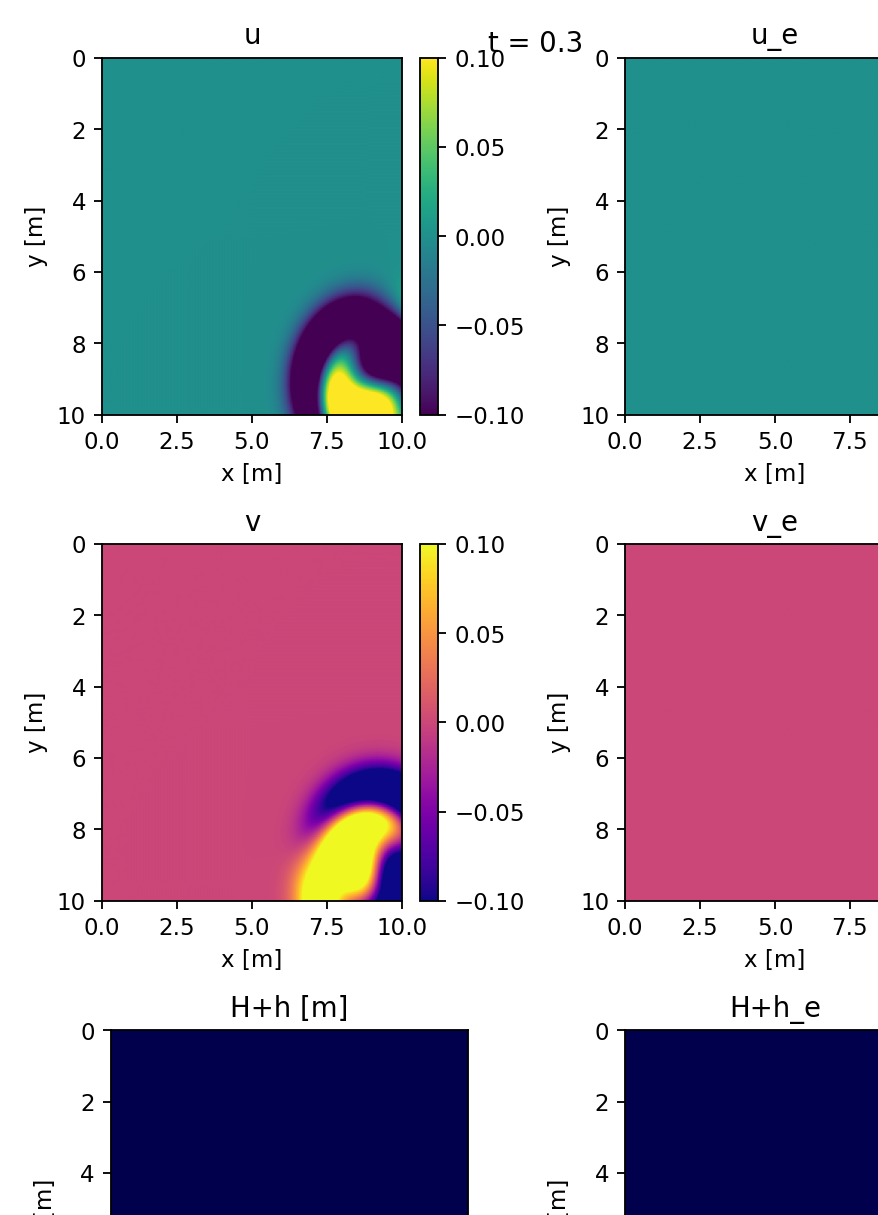

In [9]:
#image = plt.imshow(p.transpose(), aspect='auto',extent=[0,Lx,Ly,0]
#          ,cmap = 'seismic', vmin=1e-3, vmax=0.25, animated=True, 
#          interpolation='none')

fig, axes = plt.subplots(3, 2, figsize=(6.5, 9))

im1 = axes[0,0].imshow(u.transpose(), aspect='auto',extent=[0,Lx,Ly,0], cmap='viridis')
axes[0,0].set_title('u')
axes[0,0].set_xlabel('x [m]')
axes[0,0].set_ylabel('y [m]')
fig.colorbar(im1, ax=axes[0,0])

im2 = axes[0,1].imshow(u_e.transpose(), aspect='auto',extent=[0,Lx,Ly,0], cmap='viridis')
axes[0,1].set_title('u_e')
axes[0,1].set_xlabel('x [m]')
axes[0,1].set_ylabel('y [m]')
fig.colorbar(im2, ax=axes[0,1])

im3 = axes[1,0].imshow(v.transpose(), aspect='auto',extent=[0,Lx,Ly,0], cmap='plasma')
axes[1,0].set_title('v')
axes[1,0].set_xlabel('x [m]')
axes[1,0].set_ylabel('y [m]')
fig.colorbar(im3, ax=axes[1,0])

im4 = axes[1,1].imshow(v_e.transpose(), aspect='auto',extent=[0,Lx,Ly,0], cmap='plasma')
axes[1,1].set_title('v_e')
axes[1,1].set_xlabel('x [m]')
axes[1,1].set_ylabel('y [m]')
fig.colorbar(im4, ax=axes[1,1])

im5 = axes[2,0].imshow(H+h.transpose(), aspect='auto',extent=[0,Lx,Ly,0]
          ,cmap = 'seismic', vmin=H, vmax=H+0.1, animated=True, 
          interpolation='none')
axes[2,0].set_title('H+h [m]')
axes[2,0].set_xlabel('x [m]')
axes[2,0].set_ylabel('y [m]')
fig.colorbar(im5)
axes[2, 0].set_aspect('equal', 'box')

im6 = axes[2,1].imshow(H+h_e.transpose(), aspect='auto',extent=[0,Lx,Ly,0]
          ,cmap = 'seismic', vmin=H, vmax=H+0.1, animated=True, 
          interpolation='none')
axes[2,1].set_title('H+h_e')
axes[2,1].set_xlabel('x [m]')
axes[2,1].set_ylabel('y [m]')
fig.colorbar(im6, ax=axes[2,1])

plt.tight_layout()

fig.suptitle(f"t = {Tend}")

plt.show()

In [10]:
# initialise timer
start = timeit.default_timer()

# loop in time
#u = np.zeros((nx,ny))            # discrete domain
for t in drange(0, Tend, dt):
    n = n+1
    #compute numerical solution
    
    u,v,h = RK4(u, v, h, nx, dx, ny, dy, U, V, H, g, f, t, order, mms)
    
    # Exact solution
    u_e,v_e,h_e,f_u,f_v,f_h = 0*u,0*u,0*u,0*u,0*u,0*u
    if mms:
        u_e,v_e,h_e,f_u,f_v,f_h = mms_func(x,y,t+dt,U,V,H,g,f)
   
    T.append(t)
    # Updating plots
    if n % iplot == 0:           # you can change the speed of the plot by increasing the plotting interval
        im1.set_data(u.transpose())
        im2.set_data(u_e.transpose())
        im3.set_data(v.transpose())
        im4.set_data(v_e.transpose())
        im5.set_data(H+h.transpose())
        im6.set_data(H+h_e.transpose())
        plt.gcf().canvas.draw()
        #plt.show()
        #print(it)
        
plt.ioff()
plt.show()

In [11]:
stop = timeit.default_timer()

print('total simulation time = ', stop - start, 's')            # print the time required for simulation
print('number of grid points = ', nx, 'x', ny)                  # print the degree of freedom
print('uniform spatial step = ', dx, 'm')                      # print the spatial step

l2_error = np.sqrt(np.sum((u_e-u)**2)*dx*dy+np.sum((v_e-v)**2)*dx*dy+np.sum((h_e-h)**2)*dx*dy)
print('l2 error = ', l2_error)          # print the l2 error
print('log2 l2 error = ', np.log2(l2_error))  # print the log2 of l2 error


total simulation time =  12.51886910002213 s
number of grid points =  201 x 201
uniform spatial step =  0.05 m
l2 error =  0.7703705101297044
log2 l2 error =  -0.3763756171783852


In [12]:
#51
#l2 error =  0.04590917163378531
#log2 l2 error = -4.445073788885667

#101
#l2 error =  0.005542552919269052
#log2 l2 error =  -7.495233644918615
p1 = -4.445073788885667+7.495233644918615
print(p1)

#201
#l2 error =  0.0006791067789550721
#log2 l2 error =  -10.524073945937499
p2=-7.495233644918615+10.524073945937499
print(p2)

#401
#l2 error =  8.419973131578668e-05
#log2 l2 error =  -13.535824844826857
p3 = -10.524073945937499+13.535824844826857
print(p3)

#801
#l2 error =  3.4441816107080768e-06
#log2 l2 error =  -18.14740735168815
#p4 = -13.535824844826857+18.14740735168815
#print(p4)

grid_size = [0.2, 0.1, 0.05, 0.025]
error_vec_o4 = [0.04590917163378531, 0.005542552919269052, 0.0006791067789550721, 8.419973131578668e-05]

3.0501598560329484
3.0288403010188834
3.0117508988893587


<IPython.core.display.Javascript object>


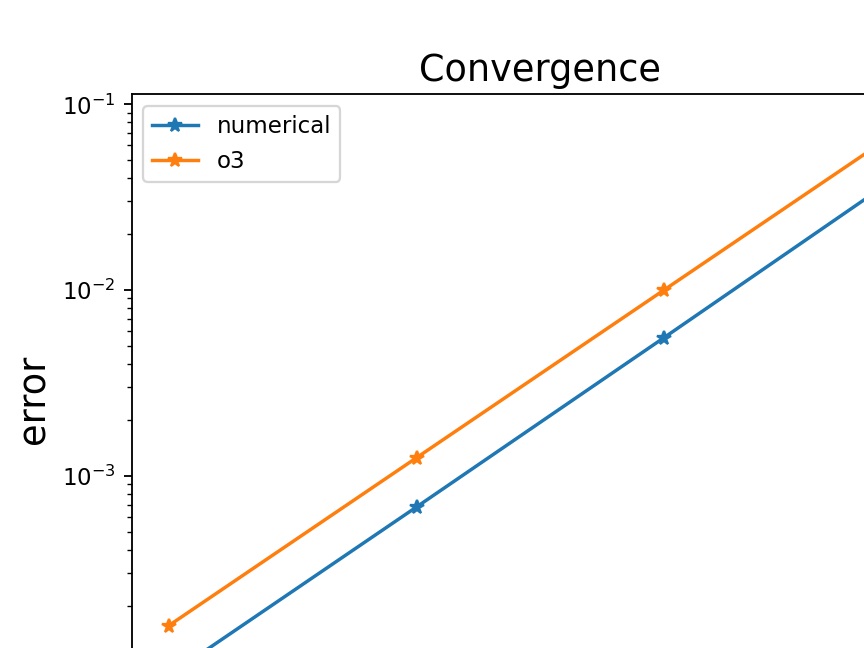

In [13]:
plt.plot(grid_size, error_vec_o4, '-*',grid_size, 10*np.array(grid_size)**3, '-*')
plt.loglog()
plt.legend(('numerical','o3'))
plt.title('Convergence', fontsize=16)
plt.xlabel('dx', fontsize=16)
plt.ylabel('error', fontsize=16)
plt.show()
